# INTRODUCTION

This case study is the Capstone Project of **Google Data Analytics Professional Certificate**. The **6 steps of Data Analysis** is used to present this analysis.

`Title`: **Cyclistic**

`Author`: Nguyen Pham Hoang Thai

`Date`: Feb 22 2023

`Find me on`:
- [Linkedin](https://www.linkedin.com/in/nphoangthaiwork/)
- [Github](https://github.com/nphoangthai)

-------------------

## How Does a Bike-Share Navigate Speedy Success?

# STEP 1: ASK

## 1.1 Background

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## 1.2 Business Task

Analyze Cyclistic Trip Data to gain insights into casual riders and annual members' behaviour when using Cyclistic bike-sharing service. Furthermore, find out the reason why customers chose to upgrade to annual membership for future marketing campaign.

## 1.3 Business Objectives

1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## 1.4 Deliverables

1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

## 1.5 Key Stakeholders

**`Cyclistic`**: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

**`Lily Moreno`**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

**`Cyclistic marketing analytics team`**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

**`Cyclistic executive team`**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

----------------------

# STEP 2: PREPARE

## Where is the data located?

The data is stored [online](https://divvy-tripdata.s3.amazonaws.com/index.html), provided by Motivate International Inc, under this [license](https://ride.divvybikes.com/data-license-agreement).

## How is the data organized?

The data include 4 ZIP files, under the name `Divvy_Trips_2019_Q1.zip`, `Divvy_Trips_2019_Q2.zip`, `Divvy_Trips_2019_Q3.zip`, `Divvy_Trips_2019_Q4.zip`.

These files store one `.CSV` file about trip data in each quarter.

To simplify the analysis, I have merged all of these files into `Divvy_Trips_2019.csv`, which you can find in the `Data` folder.

## Is the data ROCCC?

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

1. `Reliable` - HIGH - The data is owned by the City of Chicago.
2. `Original` - MED - Second party provider (Lyft Bikes and Scooters, LLC (“Bikeshare”))
3. `Comprehensive` - MED - Parameters match most of Bellabeat's products' parameters
4. `Current` - LOW - The data is 4 years old and is not relevant
5. `Cited` - HIGH - The data is provided with a license

Overall, the dataset is appropriate for this case study. 

---------------------

# STEP 3: PROCESS

For this case study, I'll be using `Python` for the remaining steps of the data analysis.

## Prepare the Environment

In [21]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

import matplotlib.pyplot as plt
import seaborn as sb

## Importing dataset

In [154]:
trip_data = pd.read_csv("Data/Divvy_Trips_2019.csv")

## First Look at the Data

### Dataset size

In [155]:
trip_data

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3817999,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
3818000,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
3818001,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
3818002,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


**Notes**

- The data set has `3818004 rows` and `12 columns`.

### Data Type

In [156]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 349.5+ MB


**Notes**
- Columns `start_time`, `end_time` and `tripduration` are wrong type.

The following data manipulation is performed:

1. Convert `start_time` and `end_time` to type `datetime64`.
2. Convert `tripduration` to type `float64`.
3. Add new columns `ride_length`, `day_of_week`, `day_name`, `quarter`, `start_end_station`, `start_hour`.
4. Drop `birthyear` and `gender` as these fields were dropped in the 2020 data
5. Convert `usertype` `Subscriber` -> `Member` and `Customer` -> `Casual`

## Data Manipulation

### Step 1

`start_time` and `end_time` column should be `datetime64` type. Other columns are fine.

In [157]:
trip_data['start_time'] = trip_data['start_time'].astype('datetime64')
trip_data['end_time'] = trip_data['end_time'].astype('datetime64')

### Step 2

`tripduration` column should be `numerical` type.

In [158]:
trip_data['tripduration'] = trip_data['tripduration'].str.replace(',', '').astype('float64')

### Step 3

`ride_length` column. The length of each ride by subtracting the column `start_time` from the column `end_time`. Format as `HH:MM:SS`.

In [159]:
trip_data['ride_length'] = trip_data['end_time'] - trip_data['start_time']

Create a column called `day_of_week` and calculate the day of the week that each ride started. Format as General or as a number with no decimals, noting that `Monday=0`, `Sunday=6`.

In [160]:
trip_data['day_of_week'] = trip_data['start_time'].dt.dayofweek

`day_name` column

In [161]:
trip_data['day_name'] = trip_data['start_time'].dt.day_name()

`quarter` column

In [162]:
trip_data['quarter'] = trip_data['start_time'].dt.quarter.apply(lambda x: 'Q' + str(x))

`start_end_station` column

In [163]:
trip_data['start_end_station'] = '(' + trip_data['from_station_name'] + ', ' + trip_data['to_station_name'] + ')'

`hour` column

In [164]:
trip_data['start_hour'] = trip_data['start_time'].dt.hour

### Step 4

In [165]:
trip_data.drop(columns = ['birthyear', 'gender'], inplace = True)

### Step 5

In [166]:
trip_data['usertype'] = trip_data['usertype'].map({'Subscriber': 'Member', 'Customer': 'Casual'})

## Statistics

### Numerical

In [167]:
trip_data.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,ride_length,day_of_week,start_hour
count,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3.818004e+06,3818004,3.818004e+06,3.818004e+06
mean,2.391563e+07,3.380252e+03,1.450203e+03,2.016659e+02,2.026363e+02,0 days 00:24:10.451397903,2.845892e+00,1.377171e+01
std,1.212667e+06,1.902511e+03,2.985414e+04,1.560798e+02,1.562388e+02,0 days 08:17:32.263421746,1.933632e+00,4.716919e+00
min,2.174244e+07,1.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,-1 days +23:03:38,0.000000e+00,0.000000e+00
25%,2.287379e+07,1.727000e+03,4.110000e+02,7.700000e+01,7.700000e+01,0 days 00:06:51,1.000000e+00,1.000000e+01
50%,2.396232e+07,3.451000e+03,7.090000e+02,1.740000e+02,1.740000e+02,0 days 00:11:49,3.000000e+00,1.500000e+01
75%,2.496370e+07,5.046000e+03,1.283000e+03,2.890000e+02,2.910000e+02,0 days 00:21:24,4.000000e+00,1.700000e+01
max,2.596290e+07,6.946000e+03,1.062840e+07,6.730000e+02,6.730000e+02,123 days 01:20:22,6.000000e+00,2.300000e+01


**Notes**

- `ride_length` has negative `min` values and extremely high `max` values.

#### `ride_length` column

Negative values in `ride_length` are due to an error which `start_time` is later than `end_time`.

In [168]:
# select rows with start_time > end_time
cond = trip_data['start_time'] > trip_data['end_time']
idx = trip_data[cond].index

# remove these rows
trip_data = trip_data.drop(index = idx).reset_index(drop = True)

Let's look into trips with `ride_length` more than 1 days.

In [169]:
cond = trip_data['ride_length'].dt.days > 0
# trip_data[cond]

100*trip_data[cond].shape[0]/trip_data.shape[0]

0.048428610753666

There are **`0.04%`** trips with **`ride_length`** longer than 1 days.

This phenomenon is strange. In real life project, I will discuss this problem with my team to find a solution but I will drop these rows for this case study.

In [170]:
cond = trip_data['ride_length'].dt.days > 0
idx = trip_data[cond].index

# remove these rows
trip_data = trip_data.drop(index = idx).reset_index(drop = True)

### Categorical

In [171]:
trip_data.describe(include = 'object')

,from_station_name,to_station_name,usertype,day_name,quarter,start_end_station
count,3816142,3816142,3816142,3816142,3816142,3816142
unique,640,641,2,7,4,131029
top,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Member,Thursday,Q3,"(Lake Shore Dr & Monroe St, Streeter Dr & Gran..."
freq,67947,81709,2936859,588040,1639905,9872


**Notes**

- `Streeter Dr & Grand Ave` is quite popular as it is on top of both start and end station.

No changes needed.

-------------------------

# STEP 4: ANALYZE

<a id='STEP_4:_ANALYZE'></a>

In [172]:
trip_data.head(3)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,ride_length,day_of_week,day_name,quarter,start_end_station,start_hour
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Member,0 days 00:06:30,1,Tuesday,Q1,"(Wabash Ave & Grand Ave, Milwaukee Ave & Grand...",0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Member,0 days 00:07:21,1,Tuesday,Q1,"(State St & Randolph St, Dearborn St & Van Bur...",0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Member,0 days 00:13:49,1,Tuesday,Q1,"(Racine Ave & 18th St, Western Ave & Fillmore ...",0


## Let's dive into the question "*How do annual members and casual riders use Cyclistic bikes differently?*"

### `Casual` and `Member` count in 2019

In [173]:
trip_data['usertype'].value_counts()

Member    2936859
Casual     879283
Name: usertype, dtype: int64

**Notes**

- The number of members are higher than casual riders.

### How many trips by `usertype` for each `quarter`?

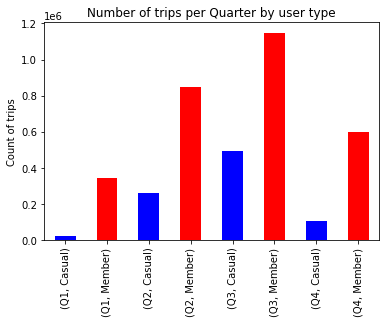

In [174]:
color = ['blue', 'red']*4

trip_data.groupby(by = ['quarter', 'usertype'])['trip_id'].count().plot.bar(subplots=True, color = color)

plt.title("Number of trips per Quarter by user type")
plt.xlabel("")
plt.ylabel('Count of trips')

plt.show()

**Notes**

- Although, the number of trips differ greatly for each user type but they share the same trend as it increased then peaked in the third quarter.

### Count of trips throughout the week by `usertype` [1]
 <a id='[1]'></a>

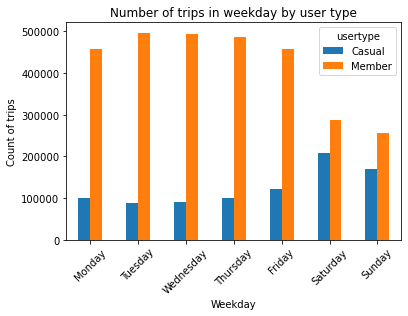

In [175]:
vals = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

temp = trip_data.pivot_table(index = 'day_of_week', columns = 'usertype', values = 'trip_id', aggfunc = 'count')
temp.index = temp.index.map(vals)

temp.plot.bar()

plt.title('Number of trips in weekday by user type')
plt.xlabel('Weekday')
plt.ylabel('Count of trips')

plt.xticks(rotation=45)

plt.show()

**Notes**

- For members of Cyclistic, the number of trips are higher during the working days (from Monday to Friday). Whereas casual riders are more active in the weekend.
- My assumption is that members usually use the bike-sharing service to commute to work while casual riders could be using it for entertainment, sight-seeing, excersises, ... . This is our first key difference in these two types of user's behaviour.

### Average `tripduration` by `usertype` [2]

 <a id='[2]'></a>

In [176]:
trip_data.groupby(by = 'usertype')['tripduration'].mean()

usertype
Casual    2365.448739
Member     775.632444
Name: tripduration, dtype: float64

**Notes**

- We can see that `Casual Riders` spent more time cycling than `Cyclistic Members`.

Let's see the histogram of `tripduration` by `usertype`. I also filter out the `tripduration` values higher than the third quantile value for each `usertype` as those values affect the first histogram greatly.

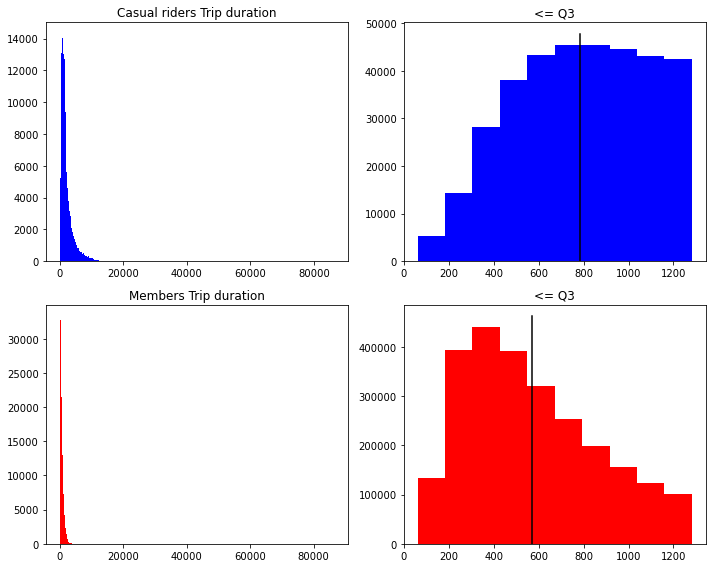

In [177]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

# CASUAL RIDERS
# Plot tripduration histogram on all rows
cond = (trip_data['usertype'] == 'Casual')
temp = trip_data[cond]

ax[0, 0].hist(temp['tripduration'], color = 'blue', bins = 'auto')
ax[0, 0].set_title('Casual riders Trip duration')

# Plot tripduration histogram on rows with `tripduration` < 235
cond = (trip_data['usertype'] == 'Casual') & (trip_data['tripduration'] <= trip_data['tripduration'].quantile(0.75))
temp = trip_data[cond]

ax[0, 1].hist(temp['tripduration'], color = 'blue')
ax[0, 1].plot([temp['tripduration'].mean()]*2, [0, ax[0, 1].get_ylim()[1]], color = 'black')
ax[0, 1].set_title('<= Q3')


# CYCLISTIC MEMBERS
# Plot tripduration histogram on all rows
cond = (trip_data['usertype'] == 'Member')
temp = trip_data[cond]

ax[1, 0].hist(temp['tripduration'], color = 'red', bins = 'auto')
ax[1, 0].set_title('Members Trip duration')

# Plot tripduration histogram on rows with `tripduration` < 64
cond = (trip_data['usertype'] == 'Member') & (trip_data['tripduration'] <= trip_data['tripduration'].quantile(0.75))
temp = trip_data[cond]

ax[1, 1].hist(temp['tripduration'], color = 'red')
ax[1, 1].plot([temp['tripduration'].mean()]*2, [0, ax[1, 1].get_ylim()[1]], color = 'black')
ax[1, 1].set_title('<= Q3')

fig.tight_layout()
plt.show()

In [199]:
cond = (trip_data['usertype'] == 'Casual') & (trip_data['tripduration'] <= trip_data['tripduration'].quantile(0.75))
temp = trip_data[cond]
temp.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,ride_length,day_of_week,start_hour
count,3.503980e+05,350398.000000,350398.000000,350398.000000,350398.000000,350398,350398.000000,350398.000000
mean,2.407586e+07,3318.018231,784.315730,196.019455,198.701014,0 days 00:13:04.655534563,3.415710,14.577341
std,1.018602e+06,1883.141430,295.073394,157.077392,159.172020,0 days 00:04:55.123839589,2.003358,4.627735
min,2.174246e+07,1.000000,61.000000,1.000000,1.000000,0 days 00:01:01,0.000000,0.000000
25%,2.331157e+07,1679.000000,554.000000,76.000000,75.000000,0 days 00:09:14,2.000000,12.000000
50%,2.413963e+07,3383.000000,795.000000,165.000000,168.000000,0 days 00:13:15,4.000000,15.000000
75%,2.489298e+07,4954.000000,1032.000000,288.000000,289.000000,0 days 00:17:12,5.000000,18.000000
max,2.596285e+07,6946.000000,1282.000000,673.000000,673.000000,0 days 01:11:32,6.000000,23.000000


**Notes**

- Both histogram of `Casual` and `Member` are left-skewed.
- The better convergence of `Member` `tripduration` might suggest that these users use Cyclistic for defined purposes. On the contrary, `Casual` histogram shows a wider spread of `tripduration`, which I assume that they have more leisure time at hand.
- The `<= Q3` charts show more clearly how different users of `Casual` or `Member` spend their time with the service.

### Difference in the `start_hour` of each `usertype` trip [3]

 <a id='[3]'></a>

In [181]:
temp = trip_data.pivot_table(index = 'start_hour', columns = 'usertype', values = 'trip_id', aggfunc = 'count')

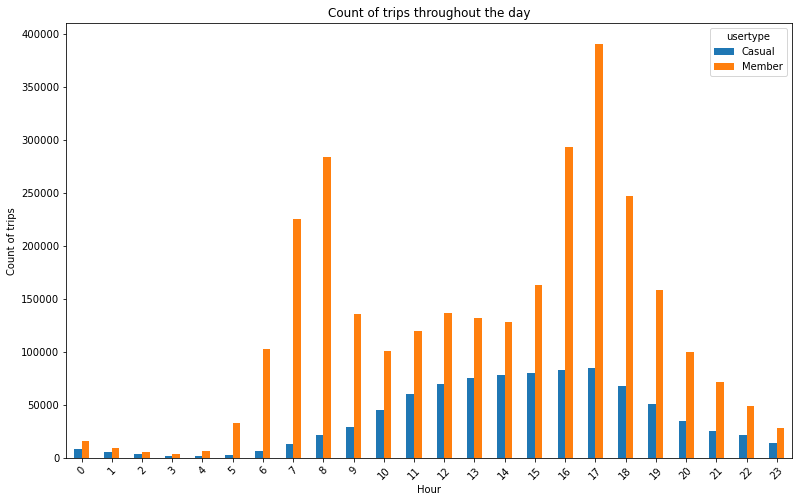

In [197]:
temp.plot.bar(figsize = (13, 8))

plt.xlabel('Hour')
plt.ylabel('Count of trips')
plt.title('Count of trips throughout the day')

plt.xticks(rotation=45)

plt.show()

**Notes**

- The bar chart shows that the number of trips from `Member` peaked around `7 to 8 o'clock` and `16 to 17 o'clock`, which matches the usual working hours. On the contrary, `Casual` users mostly active from noon to early evening hours.

--------------------

# STEP 5: SHARE

I have created a dashboard for this case study. You can find it [here]()!

-----------------------

# STEP 6: ACT

Let's re-visit three business questions we proposed before.

**1.** How do annual members and casual riders use Cyclistic bikes differently?

**2.** Why would casual riders buy Cyclistic annual memberships?

**3.** How can Cyclistic use digital media to influence casual riders to become members?

For `Question 2`, I think that the current data is not sufficient enough to answer because it essentially lacks the information when users first became `Cyclistic` member or general information about the customers. Because of this, I couldn't really answer `questions 3` as well. 

About **Question 1**

- Combine [[1](#[1])], [[2](#[2])], [[3](#[3])] in [[STEP 4](#STEP_4:_ANALYZE)], I have concluded some notes:
    
    | Aspect | Member | Casual |
    | ------ | ------ | ------ |
    |Occurence|Mostly on work days|Mostly on the weekend|
    |Average duration for trip| ~ 10 minutes|~ 13 minutes|
    |Hours of a day|peaked around `7 to 8 o'clock` and `16 to 17 o'clock`|from noon to early evening hours|
    
    
- From the above, it's safe to say that the differences between them are when and how much time they use the service.
    - `Member` customers use the service regularly but their rides are often short. My assumption is that they use Cyclistic to commute to work.
    - On the other hand, `Casual` riders trips are fewer but often longer. I assume that they mostly use Cyclistic bikes for entertainment or emergency situations, which is why they don't really need the annual membership as they don't use the service often.

## Recommendations

To encourage `Casual` riders subscribe to the annual membership. I have a few recommendations:

`1.` Because `Casual` riders spend more time cycling than `Member`, which may equal to longer rides, Cyclistic could offer rewards when they ride longer if they have a membership. More than that, given how regular `Member` use the service, the company could offer prizes for the number of times they use the bike.

`2.` Cyclistic could offer new features such as calory calculator, a leaderboard, ... for the annual membership program.

`3.` Actively advertising in the weekend as this is the time `Casual` use the service most.

---------------

# THE END